# 聚类


>以下内容参考了周志华《机器学习》 清华大学出版社 2016.

在无监督学习（unsupervised learning）中，训练样本的的标记信息是未知的。

**无监督学习的目标是通过对无标记训练样本的学习来揭示数据的内在性质及规律，为进一步的数据分析提供基础**。

此类学习任务中研究最多、应用最广的是聚类（clustering）。

![聚类示例](images/clustering/clusteringdemo.jpg)

### 聚类的应用意义

聚类即能作为一个单独过程，用于寻找数据的潜在分布结构，也可以作为分类等其他学习任务的前驱过程。

例如，在一些商业应用中需要对新用户的类型进行判别（用户画像），但定义“用户类型”对商家来说却不太容易，这时可以借助聚类工具对用户数据进行分析，根据聚类结果将每个簇定义为一个类，然后再基于这些类训练分类模型，用于判别新用户的类型。

![用户画像的要素](images/clustering/用户画像的要素.jpg)

#### 用户画像示例
![用户画像示例](images/clustering/用户画像示例.jpg)

## 聚类任务

聚类算法试图将数据集中的样本，划分为若干个通常是不相交的子集，每个子集称为一个“簇”（cluster）。

划分后，每个簇可能对应某个潜在的概念/类别，以西瓜为例：“本地瓜”、“外地瓜”等。

**需要注意：这些概念事先是未知的，聚类过程仅能够自动形成簇结构，簇所对应的概念语义需由使用者（聚类算法之外的程序或人）来把握和命名。**


形式化表示：

假定样本集 $D={x_1,x_2,...,x_m}$ 包含m个无标记样本，每个样本 $x_i = (x_{i1},x_{i2},...,x_{im}) $ 是一个n维特征向量，则聚类算法将样本集D划分为k个不相交地簇 $ \{C_l | l = 1,2,...,k \}$ ，其中 $ C_{l'} \cap _{l'\neq _l }C_l = \emptyset $ 且 $D= \cup ^k _{l=1} C_l $ 。

相应地，我们用 $\lambda_j \in {1,2,...,k} $ 表示样本$x_j$的“簇标记”（cluster label），即$x_j \in C_{\lambda_j}$。

于是，聚类的结果可用包含m个元素的簇标记向量$\lambda = (\lambda_1;\lambda_2;...;\lambda_m)$表示。


## 距离计算

对函数dist(.,.),若它是一个“距离向量”（distance measure），则需要满足一些基本性质：

- 非负性：$ dist(x_i,x_j) \geq 0$ —— 式(14)
- 同一性：$ dist(x_i,x_j) = 0 $当前仅当$x_i= x_j$ ——式(15)
- 对称性：$ dist(x_i,x_j) = dist(x_j,x_i) $ —— 式(16)
- 直递性：$ dist(x_i,x_j) \leq dist(x_i,x_k) + dist(x_k,x_j)$ —— 式(17)

### 闵可夫斯基距离

给定样本$x_i = (x_{i1};x_{i2};...;x_{in})$ 与$x_j = (x_{j1};x_{j2};...;x_{jn})$，最常用的式“闵可夫斯基距离”（Minkowski distance）：

> $dist_{mk}(x_i,x_j) = (\sum_{u=1}^n|x_{iu} - x_{ju}|^p)^\frac{1}{p}$  —— 式(18)

对$p \geq 1$，式（18）显然满足式（14）~式（18）的距离度量基本性质。其实，式（18）即为$x_i-x_j$的$L_p$范数$||x_i-x_j||_p$

> L-P范数是一组范数，$L_p = ||X||_p = \sqrt[p]{\sum_{i=1}^{n} |x_i|^p}, X = (x_1,x_2,...,x_n)$ 


根据$dist_{mk}(x_i,x_j) = (\sum_{u=1}^n|x_{iu} - x_{ju}|^p)^\frac{1}{p}$ 

- p=2时，即为欧式距离（Euclidean distance）
- p=1时，即为曼哈顿距离（Manhattan distance)，也称为“街区距离”（city block distance）

我们常将属性划分为：
- “连续属性”（continuous attribute）或“数值属性”（numerical attribute）
- “离散数学”（categorical attribute）或“列命属性”（nominal attribute）

连续属性在定义域上有无穷多个可能的取值，而离散属性在定义域上是有限个取值。

然而在讨论距离计算时，属性上是否定义了“序”关系更为重要。

例如定义域为{1，2，3}的离散属性与连续属性的性质更接近一些，能直接在属性值上计算距离：“1”与“2”比较接近、与“3”比较远，这样的属性称为“有序”属性（ordinal attribute）；而定义域为{飞机，火车，轮船}这样的离散属性则不能直接在属性值上计算距离，称为“无序属性”（non-ordinal attribute）。

显然，**闵可夫斯基距离可用于有序属性。**

#### VDM距离

对于无序属性，可采用VDM（Value Difference Metric）。

令$m_{u,a}$表示在属性u上取值为a的样本数，$m_{u,a,i}$表示在第i个样本簇中属性u上取值为a的样本数，k为样本簇数，则属性u上两个离散值a与b之间的VDM距离为：

> $VDM_p(a,b) = \sum_{i=1}^k|\frac{m_{u,a,i}}{m_{u,a}}-\frac{m_{u,b,i}}{m_{u,b}}|^p$ —— 式（21）

于是，**将闵可夫斯基距离和VDM结合即可处理混合属性。**

假定有$n_c$个有序属性、$n-n_c$个无序属性，不失一般性，令有序属性排列在无序属性之前，则有：

> $MinkovDM_p(x_i,x_j) = (\sum_{u=1}^{n_c}|x_{iu}-x_{ju}|^p + \sum_{u=n_c+1}^n VDM_p(x_{iu},x_{ju}))^\frac{1}{p}$  ——式（22）


#### 加权距离

当样本空间中不同属性的重要性不同时，可使用“加权距离”（weighted distance）。以加权闵可夫斯基距离为例：

$dist_{wmk}(x_i,x_j) = (\sum_{u=1}^n \omega_u|x_{iu} - x_{ju}|^p)^\frac{1}{p}$  —— 式(23)

其中，权重$\omega_u \geq 0 (i = 1,2,...n)$表征不同属性的重要性，通常$\sum_{u=1}^n \omega_u = 1$。

需要注意的是，通常我们是基于某种形式的距离来定义“相似度度量”（similarity measure），距离越大，相似度越小。然而，用于相似度度量的距离未必一定要满足距离度量的所有基本性质，尤其是直递性（式17）。

例如：可能要“人”“马”分别与“人马”相似，但“人”与“马”很不相似。要达到这个目的可令“人”、“马”与“人马”之间的距离都比较小，但“人”与“马”之间的距离很大。**此时该距离不再满足直递性，这样的距离称为“非度量距离”（non-metric distance）**。

此外，本节介绍的距离计算式都是事先定义好的，但有些任务中，有必要基于数据样本来确定合适的距离计算式，或者可通过“距离度量学习”（distance metric learning）来实现。

#### “非度量距离”（non-metric distance）举例
![ “非度量距离”（non-metric distance）举例](images\clustering\非度量距离例子.png)

## 原型聚类

原型聚类亦称为“基于原型的聚类”（prototype-based clustering），此类算法假设聚类结构能通过一组原型刻画，在现实聚类任务中极为常用。

通常情形下，算法先对原型进行初始化，然后对原型进行迭代更新求解。

采用不同的原型表示、不同的求解方式，将产生不同的算法。下面是一些著名的原型聚类算法：

- k均值算法
- 学习向量量化
- 高斯混合聚类

### K-MEANS算法

K-Means算法是一种典型的聚类算法。

#### 一般形式：

给定样本集 $ D = \{x_1,x_2,...，x_m\}$，“k均值”（k-means）算法针对聚类所得簇划分 $ C = \{C_1,C_2,...,C_k\}$ 最小化平方误差：

$ E = \sum_{i=1}^k \sum_{x \in C_i}||x- \mu_i||_2^2$ ——式（24）

其中，$\mu_i = \frac{1}{|C_i|}\sum_{x \in C_i}x$ 是簇$C_i$的均值向量。

直观来看，式（24）在一定程度上刻画了簇内样本围绕簇均值向量的紧密程度，E值越小则簇内样本相似度越高。

#### 最小化

求式（24）的最小化并不容易，找到它的最优解需要考查样本集D所有可能的簇划分，这是一个NP难题（Aloise et al. 2009)。

因此，k均值算法采用了贪心策略，通过迭代优化来近似求解式（24）。

#### k均值算法流程（贪心策略）

K-means聚类算法以k为参数，把n各对象分成k个簇，使簇内具有较高的相似度，而簇间的相似度较低。它的基本思想有以下几点：

  - 随机选择k个点，作为初始的聚类中心；
  - 对于剩下的点，根据其与聚类中心的距离，将其归入最近的簇；
  - 对每个簇,计算所有点的均值作为新的聚类中心；
  - 重复上述两步直到聚类中心不再发生改变。

请看下面图示：
图1：给定一个数据集；
![图1](images\clustering\example1.jpg)
图2：根据K = 5初始化聚类中心，保证　聚类中心处于数据空间内；
![图2](images\clustering\example2.jpg)
图3：根据计算类内对象和聚类中心之间的相似度指标，将数据进行划分；
![图3](images\clustering\example3.jpg)
图4：将类内之间数据的均值作为聚类中心，更新聚类中心。
![图4](images\clustering\example4.jpg)
最后判断算法结束与否即可，目的是为了保证算法的收敛。

![k均值算法流程](images\clustering\k均值算法流程.png)

下面以下表所示数据为例，进行演示k-mean算法的学习过程。

![西瓜数据集4](images\clustering\西瓜数据集4.png)

假定聚类簇数 k=3，算法开始时随机选取三个样本$x_6,x_{12},x_{27}$作为起始均值向量，即：

$\mu_1 = (0.403;0.237), \mu_2 = (0.343;0.099), \mu_3 = (0.532;0.472)$

考察样本$x_1 = (0.697;0.460)$,它与当前均值向量 $\mu_1,\mu_2,\mu_3$ 的距离分别为0.369，0.506，0.166.因此$x_1$被划入簇$C_3$中。类似的，对数据集中的所有样本考察一遍后，可得当前簇划分为：

$C_1 = \{x_5,x_6,x_7,x_8,x_9,x_10,x_13,x_14,x_17,x_18,x_19,x_20,x_23\}$

$C_2 = \{x_11,x_12,x_16\}$

$C_3 = \{x_1,x_2,x_3,x_4,x_21,x_22,x_24,x_25,x_26,x_27,x_28,x_29,x_30\}$

于是，可从$C_1,C_2,C_3 $分别求出新的均值向量：

$\mu_1^{'} = (0.473;0.214), \mu_2^{'} = (0.394;0.066), \mu_3^{'} = (0.623;0.388)$

更新当前均值向量后，不断重复上述过程，如下图所示，第五轮迭代产生的结果与第四轮迭代相同，于是算法停止，得到最终的簇划分。

![kmean聚类西瓜集4](images\clustering\kmean聚类西瓜集4.png)

#### 贪心算法

在每一步求解的步骤中，它要求“贪婪”的选择最佳操作，并希望通过一系列的最优选择，能够产生一个问题的（全局的）最优解。

贪心算法每一步必须满足一下条件：

- 可行的：即它必须满足问题的约束。

- 局部最优：他是当前步骤中所有可行选择中最佳的局部选择。

- 不可取消：即选择一旦做出，在算法的后面步骤就不可改变了。

例如：

【活动选择问题】这是《算法导论》上的例子，也是一个非常经典的问题。有n个需要在同一天使用同一个教室的活动a1,a2,…,an，教室同一时刻只能由一个活动使用。每个活动ai都有一个开始时间si和结束时间fi 。一旦被选择后，活动ai就占据半开时间区间[si,fi)。如果[si,fi]和[sj,fj]互不重叠，ai和aj两个活动就可以被安排在这一天。该问题就是要安排这些活动使得尽量多的活动能不冲突的举行。例如下图所示的活动集合S，其中各项活动按照结束时间单调递增排序。

用贪心法的话思想很简单：活动越早结束，剩余的时间是不是越多？那我就早最早结束的那个活动，找到后在剩下的活动中再找最早结束的不就得了？

虽然贪心算法的思想简单，但是贪心法不保证能得到问题的最优解，如果得不到最优解，那就不是我们想要的东西了，所以我们现在要证明的是在这个问题中，用贪心法能得到最优解。

#### k-means的应用案例

- 数据介绍

现有1999年全国31个省份城镇居民家庭平均每人全年消费性支出的八个主要变量数据，这8个变量分别是：**食品、衣着、家庭设备用品及服务、医疗保健、交通和通信、娱乐教育文化服务、居住、杂项商品和服务**。


- 实验目的

通过聚类，将1999年各个省份的消费水平划分为4个等级。


- 技术路线

使用 sklearn.cluster.Kmeans算法，进行聚类学习。


- 实验过程

  + step 1 读取数据
  + step 2 数据预处理
  + step 3 训练模型，确定k的数目
  

In [6]:
"""数据概览
"""
import pandas as pd

df=pd.read_csv('data/clustering/31city.txt',
               names=['地区','食品','衣着','家庭设备用品及服务','医疗保健','交通和通信','娱乐教育文化服务','居住','杂项商品和服务'],encoding='gb2312')
df.head()


,地区,食品,衣着,家庭设备用品及服务,医疗保健,交通和通信,娱乐教育文化服务,居住,杂项商品和服务
0,北京,2959.19,730.79,749.41,513.34,467.87,1141.82,478.42,457.64
1,天津,2459.77,495.47,697.33,302.87,284.19,735.97,570.84,305.08
2,河北,1495.63,515.90,362.37,285.32,272.95,540.58,364.91,188.63
3,山西,1406.33,477.77,290.15,208.57,201.50,414.72,281.84,212.10
4,内蒙古,1303.97,524.29,254.83,192.17,249.81,463.09,287.87,192.96


**sklearn中使用K-Means方法所需的参数有：**

- n_clusters: 用于指定聚类中心的个数；
- init：初始聚类中心的初始化方法；
- max_iter：最大的迭代次数；

一般调用时只能给出n_clusters即可，init默认是k-means++ ,max_iter默认为300.

In [9]:
import numpy as np
from sklearn.cluster import KMeans 

cluster = KMeans(n_clusters=5)#将各省消费水平分为4个等次

label = cluster.fit_predict(df.iloc[:,1:])
print(label)
expenses = np.sum(cluster.cluster_centers_ ,axis = 1)
CityCluster = [[],[],[],[],[]]

for i in range(df.shape[0]):
    CityCluster[label[i]].append(df.iloc[i,0])

for i in range(len(CityCluster)):
    print("消费指数:%.2f" % expenses[i])
    print(CityCluster[i])


[2 1 0 0 0 0 0 0 2 3 1 3 1 0 0 0 3 3 4 3 3 1 3 0 3 1 0 0 0 0 0]
消费指数:3788.76
['河北', '山西', '内蒙古', '辽宁', '吉林', '黑龙江', '江西', '山东', '河南', '贵州', '陕西', '甘肃', '青海', '宁夏', '新疆']
消费指数:5678.62
['天津', '浙江', '福建', '重庆', '西藏']
消费指数:7873.09
['北京', '上海']
消费指数:4512.27
['江苏', '安徽', '湖南', '湖北', '广西', '海南', '四川', '云南']
消费指数:7517.80
['广东']


## 密度聚类

密度聚类也称为“基于密度的聚类”（density-based clustering）。

此类算法假设聚类结构能够通过样本分布的紧密程度确定。通常情况下，密度聚类算法从样本密度的角度来考察样本之间的可连接性，并基于可连接样本不断扩展聚类簇，以获得最终的聚类结果。

### DBSCAN 方法

DBSCAN是一种著名的密度聚类算法，它不需要预先指定簇的个数，但最终的簇个数不确定。

DBSCAN基于一组“邻域”（neighborhood)参数$(\epsilon, MinPts)$来刻画样本分布的紧密程度。

给定数据集$D = \{x_1,x_2,..,x_m\}$，定义下面这几个概念：

- $\epsilon $ -邻域：对 $x_j \in D$，其 $\epsilon $ -邻域 包含样本集D中与$x_j$的距离不大于$\epsilon$的样本，即$N_{\epsilon}(x_j) = \{x_i \in D |dist(x_i,x_j) \leq \epsilon \}$

- 核心对象（core object）：若$x_j$的 $\epsilon $ -邻域至少包含MinPts个样本，即$|N_{\epsilon}(x_j)| \geq MinPts$，则$x_j$是一个核心对象；

- 密度直达（directly density-reachable）：若$x_j$位于$x_i$的$\epsilon $ -邻域中，且$x_i$是核心对象，则称$x_j$由 $x_i$密度直达；密度直达关系通常不满足对称性。

- 密度可达（density-reachale）：对$x_i$与$x_j$，若存在样本序列$p_1,p_2,...,p_n$，其中$p_1 = x_i,p_n = x_j$ 且$p_{i+1}$由$p_i$密度直达，则称$x_j$由$x_i$密度可达；密度可达关系满足直递性，不满足对称性。

- 密度相连（density-connected）：对$x_i$与$x_j$，若存在$x_k$使得$x_i$与$x_j$均由$x_k$密度可达，则称$x_i$与$x_j$密度相连。密度相连关系满足对称性。

![dbscan基本概念的示意图](images/clustering/dbscan基本概念的示意图.png)

基于这些概念，**DBSCAN将“簇”定义为：由密度可达关系导出的最大的密度相连样本集合**。形式化地说，给定邻域参数$(\epsilon , MinPts)$，簇$ C \subseteq D$是满足以下性质的非空样本子集：

> 连结性（connectivity）：$x_i \in C ,x_j \in C \rightarrow x_i 与 x_j密度相连$  ——式（39）

> 最大性（maximality）：$x_i \in C x_j 由 x_i 密度可达 \rightarrow x_j \in C$  ——式（40）

那么？如何从数据集D中找出满足以上性质的聚类簇呢？

实际上，若x为核心对象，由x的密度可达的所有样本组成的集合记为$X = \{ x' \in D |x' 由x密度可达\}$，则不难证明X即为满足连结性和最大性的簇。

于是，DBSCAN算法先任选数据集中的一个核心对象为“种子”（seed），再由此出发确定相应的聚类簇，算法描述如下：

![DBSCAN算法](images/clustering/DBSCAN算法.png)


##### 实例

- 数据介绍

现有大学校园网的日志数据，290条大学生的校园网使用情况数据，数据包括：（ 记录编号,学生ID,MAC地址,IP地址,开始上网时间,停止上网时间,上网时长,子网号,学生网络模板,套餐类型,联网类型）。

![学生上网记录数据样本示例](images/clustering/学生上网记录数据样本示例.png)


- 实验目的

通过聚类，利用已有数据，分析学生上网时间的分簇模式。

- 技术路线

使用 sklearn.cluster.DBSCAN算法，进行聚类学习。


- 实验过程

  + step 1 读取数据
  + step 2 数据预处理
  + step 3 训练模型
  

In [75]:
#load data

import pandas as pd

df1 = pd.read_csv('data/clustering/studentnetuse.txt',names=['记录编号','学生ID','MAC地址','IP地址','开始上网时间','停止上网时间','上网时长','子网号','学生网络模板','套餐类型','联网类型'])
df1.head()

,记录编号,学生ID,MAC地址,IP地址,开始上网时间,停止上网时间,上网时长,子网号,学生网络模板,套餐类型,联网类型
0,2c929293466b97a6014754607e457d68,U201215025,A417314EEA7B,10.12.49.26,2014-07-20 22:44:18.540000000,2014-07-20 23:10:16.540000000,1558,15,本科生动态IP模版,100元每半年,internet
1,2c929293466b97a60147546099a57d81,U201116197,F0DEF1C78366,222.20.71.38,2014-07-20 12:14:21.380000000,2014-07-20 23:25:22.380000000,40261,1,本科生动态IP模版,20元每月,internet
2,2c929293466b97a60147546099fa7d86,M201373803,88539523E88D,10.12.59.230,2014-07-20 22:56:41.593000000,2014-07-20 23:25:22.593000000,1721,15,研究生动态IP模版,计天,internet
3,2c929293466b97a6014754609a137d88,M201370611,F0DEF167324F,218.197.241.94,2014-07-20 23:19:30.930000000,2014-07-20 23:25:21.930000000,351,1,研究生动态IP模版,20元包月,internet
4,2c929293466b97a601475460ab577d99,U201112081,B888E3813D3C,218.197.229.5,2014-07-20 16:51:56.657000000,2014-07-20 23:24:40.657000000,23564,1,本科生动态IP模版,1元每天,internet


##### sklearn 中的DBSCAN

DBSCAN类的初始化方法主要有3个参数：

- eps: 两个样本被视为邻居节点的最大距离，即$\epsilon $ -邻域 距离

- min_samples：簇的样本数MinPts

- metric：距离计算方式

DBSCAN中有3种点：

- 核心点：这种点，在以它为圆心的eps半径内，存在大于minpts个以上的点；
- 边界点：这种点，在以它为圆心的eps半径内，存在小于minpts个以上的点，但与核心点距离小于eps；
- 噪声点：既不是核心点，也不是边界点。

例如：
```
sklearn.cluster.DBSCAN(eps =0.5,min_samples=5,metric='eulidean') #欧式距离
```

Labels:
[ 0 -1  0  1 -1  1  0  1  2 -1  1  0  1  1  3 -1 -1  3 -1  1  1 -1  1  3
  4 -1  1  1  2  0  2  2 -1  0  1  0  0  0  1  3 -1  0  1  1  0  0  2 -1
  1  3  1 -1  3 -1  3  0  1  1  2  3  3 -1 -1 -1  0  1  2  1 -1  3  1  1
  2  3  0  1 -1  2  0  0  3  2  0  1 -1  1  3 -1  4  2 -1 -1  0 -1  3 -1
  0  2  1 -1 -1  2  1  1  2  0  2  1  1  3  3  0  1  2  0  1  0 -1  1  1
  3 -1  2  1  3  1  1  1  2 -1  5 -1  1  3 -1  0  1  0  0  1 -1 -1 -1  2
  2  0  1  1  3  0  0  0  1  4  4 -1 -1 -1 -1  4 -1  4  4 -1  4 -1  1  2
  2  3  0  1  0 -1  1  0  0  1 -1 -1  0  2  1  0  2 -1  1  1 -1 -1  0  1
  1 -1  3  1  1 -1  1  1  0  0 -1  0 -1  0  0  2 -1  1 -1  1  0 -1  2  1
  3  1  1 -1  1  0  0 -1  0  0  3  2  0  0  5 -1  3  2 -1  5  4  4  4 -1
  5  5 -1  4  0  4  4  4  5  4  4  5  5  0  5  4 -1  4  5  5  5  1  5  5
  0  5  4  4 -1  4  4  5  4  0  5  4 -1  0  5  5  5 -1  4  5  5  5  5  4
  4]
Noise raito: 22.15%
簇个数的估计值: 6
轮廓系数: 0.710
Cluster  0 :
[22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  2., 24., 28.,  3.,  8.,  4.,  5.,
         4.,  4.,  5.,  7.,  3.,  8.,  7., 28., 25., 55., 65.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

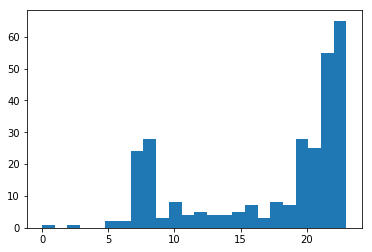

In [117]:
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
     

#时间数据预处理,时间型数据既可以看作是连续型，也可以看作是离散型。

temp=pd.DatetimeIndex(df1['开始上网时间'])
df1['开始上网日期']=temp.date #添加date和time两个键和值
df1['开始上网时间1']=temp.time
df1['开始上网时间2'] = temp.hour#由于时间的部分最小粒度为小时，所以把time变为hour更加简洁
X = df1.iloc[:,-1].values[:, np.newaxis]
db=skc.DBSCAN(eps=0.01,min_samples=20).fit(X)
labels = db.labels_
print('Labels:')
print(labels)

# 计算标记为-1 的噪声点的比例
raito=len(labels[labels[:] == -1]) / len(labels) 
print('Noise raito:',format(raito, '.2%'))

# 去除噪声点后，计算簇的个数
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('簇个数的估计值: %d' % n_clusters_)
print("轮廓系数: %0.3f"% metrics.silhouette_score(X, labels))

for i in range(n_clusters_):
    print('Cluster ',i,':')
    print(list(X[labels == i].flatten()))

plt.hist(X,24)#24指总共有多少条